In [1]:
def hint(string): return print(''.join(map(chr, map(lambda x: int(x, 16), string.split('.')))))

## Background Knowledge

#### Q1. 简述自动摘要技术的三个应用场景？

In [5]:
"""
1、主题提取
"""

'\n1、主题提取\n'

#### Q2. 目前的摘要技术分为哪两类？ 

In [ ]:
"""
1、abstractive  生成式摘要
2、extractive   扩展式摘要
"""

#### Q3. 目前实现自动摘要的难点在哪里？列出三点。

In [8]:
"""
1、语句通顺,接近人对文本的理解比较困难
2、缺少标注好的数据
3、
"""

'\n1、语句通顺,接近人对文本的理解比较困难\n2、缺少标注好的数据\n3、\n'

#### Q4. 什么是PageRank？ PageRank 用在什么地方？用 $Latex$ 写出其方程

In [ ]:
"""
1、PageRank是通过构建Page之间的引用关系图，将被引用次数多的页面，就是相对高质量的内容。
2、PageRank直接的使用场景是对搜索引擎的搜索结果进行过滤
"""

#### Q5. PageRank和TextRank的关系是什么，TextRank的背景原理是什么？

In [9]:
"""
1、PageRank是通过引用关系来构造一个图，TextRank是构造类似的图，通过不同词之间的出现次数，来分析重要的词。
    - 如果一个单词出现在很多单词后面的话，那么说明这个单词比较重要
    - 一个TextRank值很高的单词后面跟着的一个单词，那么这个单词的TextRank值会相应地因此而提高
"""

'\n1、PageRank是通过引用关系来构造一个图，TextRank是构造类似的图，通过不同词之间的出现次数，来分析重要的词。\n    - 如果一个单词出现在很多单词后面的话，那么说明这个单词比较重要\n    - 一个TextRank值很高的单词后面跟着的一个单词，那么这个单词的TextRank值会相应地因此而提高\n'

#### Q6. 在存在大量原始文本以及该文本对应的摘要内容时，我们是否可以使用 Seq2Seq 进行生成？ Sequence2Sequence的原理是什么？ Attention的机制原理是什么？

In [10]:
# TODO, 这里还不太清楚

## 进行摘要提取的试验代码

In [2]:
import pandas as pd
import numpy as np
import jieba
import os

def cut(string): return ' '.join(jieba.cut(string))
path_root = '../data'
news_file = os.path.join(path_root, 'sqlResult_1558435.csv') 

In [3]:
news_file

'../data/sqlResult_1558435.csv'

In [4]:
news_content = pd.read_csv(news_file, encoding='gb18030')

In [5]:
news_content.head()['content']

0    此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...
1    骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...
2    此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...
3      这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n
4    （原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...
Name: content, dtype: object

In [6]:
pure_content = pd.DataFrame()

In [7]:
pure_content['content'] = news_content['content']

In [8]:
pure_content = pure_content.fillna('')

In [9]:
# stop_words_filename = '/data/zz/nlp/data/stop_words.txt'
# def load_stop_words():
#     """
#     加载停用词
#     :return:
#     """
#     words = set()
#     file = open(stop_words_filename, 'r', encoding="utf-8")
#     for word in file.readlines():
#         words.add(word.strip())
#     file.close()
#     return words

In [10]:
# from stanfordcorenlp import StanfordCoreNLP
# zh_model = StanfordCoreNLP(r'../data/stanford-corenlp-full-2018-10-05', lang='zh')
LTP_DATA_DIR = '/data/zz/nlp/data/ltp_data_v3.4.0/'  # ltp模型目录的路径
from pyltp import Segmentor
import os

# 加载分词模型
cws_model_path = os.path.join(LTP_DATA_DIR, 'cws.model') 

In [11]:
# STOP_WORDS = load_stop_words()

In [12]:
# zh_sentence = '我爱自然语言处理技术！'
# print ('Tokenize:', zh_model.word_tokenize(zh_sentence))
segmentor = Segmentor()  # 初始化实例
segmentor.load(cws_model_path)  # 加载模型
# segmentor.release()  # 释放模型
def cut(string): 
    words = segmentor.segment(string)  # 分词
#     words_not_stop = [w for w in words if w not in STOP_WORDS]
#     print('\t'.join(words))
#     return ' '.join(jieba.cut(string))
    return ' '.join(words)
#     return ' '.join(words_not_stop)

In [14]:
# 对内容进行分词，并保存在 tokenized_content 列中，这里有点费时间，需要有心理预期
pure_content['tokenized_content'] = pure_content['content'].apply(cut)

In [15]:
pure_content.head()

,content,tokenized_content
0,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,此外 ， 自 本周 （ 6月 12日 ） 起 ， 除 小米 手机 6 等 15 款 机型 外...
1,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,骁龙 835 作为 唯一 通过 Windows 10 桌面 平台 认证 的 ARM 处理器 ...
2,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,此前 的 一 加 3T 搭载 的 是 3400mAh 电池 ， DashCharge 快充 ...
3,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,这 是 6月 18日 在 葡萄牙 中部 大佩德罗冈 地区 拍摄 的 被 森林 大火 烧毁 的...
4,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,（ 原 标题 ： 44 岁 女子 跑 深圳 约会 网友 被 拒 ， 暴雨 中 裸身 奔走 …...


In [16]:
from gensim.models import FastText

In [17]:
with open('all_corpus.txt', 'w', encoding='utf-8') as f:
    f.write(' '.join(pure_content['tokenized_content'].tolist()))

In [18]:
from gensim.models.word2vec import LineSentence
import os 

In [19]:
model_file = './res/fastText.model'
if os.path.exists(model_file):
    model = FastText.load(model_file)
else:
    model = FastText(LineSentence('all_corpus.txt'), window=5, size=35, iter=10, min_count=2)
    model.save('./res/fastText.model')    

In [20]:
from functools import reduce

In [21]:
# 将分词后的内容做两两合并，应该是这样
reduce(lambda a, b: a + b, pure_content['tokenized_content'].tolist()).split()

['此外',
 '，',
 '自',
 '本周',
 '（',
 '6月',
 '12日',
 '）',
 '起',
 '，',
 '除',
 '小米',
 '手机',
 '6',
 '等',
 '15',
 '款',
 '机型',
 '外',
 '，',
 '其余',
 '机型',
 '已',
 '暂停',
 '更新',
 '发布',
 '（',
 '含',
 '开发版',
 '/',
 '体验版',
 '内测',
 '，',
 '稳定',
 '版',
 '暂',
 '不',
 '受',
 '影响',
 '）',
 '，',
 '以',
 '确保',
 '工程师',
 '可以',
 '集中',
 '全部',
 '精力',
 '进行',
 '系统',
 '优化',
 '工作',
 '。',
 '有人',
 '猜测',
 '这',
 '也',
 '是',
 '将',
 '精力',
 '主要',
 '用',
 '到',
 'MIUI',
 '9',
 '的',
 '研发',
 '之中',
 '。',
 'MIUI',
 '8',
 '去年',
 '5月',
 '发布',
 '，',
 '距',
 '今',
 '已',
 '有',
 '一',
 '年',
 '有余',
 '，',
 '也',
 '是',
 '时候',
 '更新换代',
 '了',
 '。',
 '当然',
 '，',
 '关于',
 'MIUI',
 '9',
 '的',
 '确切',
 '信息',
 '，',
 '我们',
 '还是',
 '等待',
 '官方',
 '消息',
 '。骁龙',
 '835',
 '作为',
 '唯一',
 '通过',
 'Windows',
 '10',
 '桌面',
 '平台',
 '认证',
 '的',
 'ARM',
 '处理器',
 '，',
 '高通',
 '强调',
 '，',
 '不',
 '会',
 '因为',
 '只',
 '考虑',
 '性能',
 '而',
 '去',
 '屏蔽',
 '掉',
 '小',
 '核心',
 '。',
 '相反',
 '，',
 '他们',
 '正',
 '联手',
 '微软',
 '，',
 '找到',
 '一',
 '种',
 '适合',
 '桌面',
 '平台',
 '的',
 '、',
 '兼顾',
 '性能'

In [22]:
tokeners = [t for l in pure_content['tokenized_content'].tolist() for t in l.split()]

In [23]:
tokeners[:10]  ##['此外', '，', '自', '本周', '（', '6', '月', '12', '日', '）']
               ##['此外', '，', '自', '本周', '（', '6月', '12日', '）', '起', '，']

['此外', '，', '自', '本周', '（', '6月', '12日', '）', '起', '，']

## Counts the words occurence

In [24]:
from collections import Counter

In [25]:
tokener_counter = Counter(tokeners)
frequence = {w: count/len(tokeners) for w, count in tokener_counter.items()}
occurences_frequences = sorted(list(frequence.values()), reverse=True)
X = range(len(occurences_frequences))

In [26]:
import matplotlib.pyplot as plt

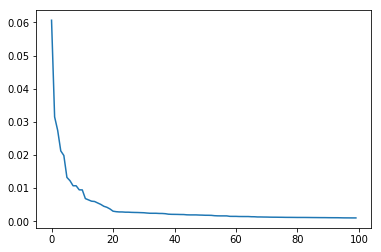

In [27]:
plt.plot(X[:100], occurences_frequences[:100])

In [129]:
# tokener_counter

## TextRank

In [29]:
import networkx
import random

In [30]:
# 这一段是用来理解如果通过newworkx构造图，计算pagerank
# def genrate_name(length=3):  return ''.join(chr(random.randint(65, 73)) for _ in range(length))

In [123]:
# genrate_name()

In [122]:
# graph = {
#     'Yao': ['Guo', 'Wang', 'Tian', 'Tim'] + [genrate_name() for _ in range(6)], 
#     'Guo': ['Li'] + [genrate_name() for _ in range(5)], 
#     'Wang': ['Li_2'] + [genrate_name() for _ in range(5)], 
#     'Li': [genrate_name() for _ in range(3)], 
#     'Li_2': [genrate_name() for _ in range(1)]
# }

In [124]:
# graph

In [125]:
# social_network = networkx.graph.Graph()

In [35]:
# for vertex, edge in graph.items():
#     for v in edge:
#         social_network.add_edges_from([(vertex, v)])

In [126]:
# networkx.draw_networkx(social_network)

In [127]:
# ranking_result = networkx.pagerank(social_network)
# sorted(ranking_result.items(), key=lambda x: x[1], reverse=True)

In [128]:
# networkx.pagerank(social_network)

## TextRank Page

In [121]:
# pure_content.head()

In [130]:
# lengthes_of_text = map(len, pure_content['content'].tolist())

In [131]:
# list(lengthes_of_text)[:20]

In [132]:
# networkx.__path__

In [133]:
from scipy.spatial.distance import cosine
from functools import partial
import re
from sklearn.decomposition import PCA
from pyltp import SentenceSplitter
import matplotlib.font_manager as fm

fp1 = fm.FontProperties(fname="/Users/mqgao/Downloads/SourceHanSerifSC-Regular.otf")
# how to set chinese display: 
# https://knowlab.wordpress.com/2016/05/25/networkx-%E7%B9%AA%E5%9C%96%E9%A1%AF%E7%A4%BA%E4%B8%AD%E6%96%87%E7%9A%84%E8%A7%A3%E6%B1%BA%E6%96%B9%E6%B3%95/


def split_sentence(sentence):
#     用正则分句后，空格也会被断开，导致摘要的结果比较怪异。
#     pattern = re.compile('[。，,.]')
#     split = pattern.sub(' ', sentence).split()  # split sentence
#     return split

    sents = SentenceSplitter.split(sentence) 
    result = [ x for x in sents if x != '']
    return result

def get_summarization_simple_with_text_rank(text, score_fn_type, constraint, window):
    return get_summarization_simple(text, score_fn_type, constraint, window)

def sentence_ranking_by_text_ranking(sentence, windows):
    '''
    根据构造好的图，计算pagerank
    '''
    sentence_graph = get_connect_graph_by_text_rank(sentence,windows)
    ranking_sentence = networkx.pagerank(sentence_graph)
    ranking_sentence = sorted(ranking_sentence.items(), key=lambda x: x[1], reverse=True)
    return ranking_sentence

def get_connect_graph_by_text_rank(split_sentence, window=3):
    '''
    将文章分句后，构造左右是windows数量的图
    '''
    keywords_graph = networkx.Graph()
    tokeners = split_sentence
#     tokeners = tokenized_text
    for ii, t in enumerate(tokeners):
        word_tuples = [(tokeners[connect], t) 
                       for connect in range(ii-window, ii+window+1) 
                       if connect >= 0 and connect < len(tokeners)]
        keywords_graph.add_edges_from(word_tuples)

    return keywords_graph


def get_summarization_simple(text, score_fn_type, constraint, windows=3):
    '''
    提取摘要内容，这里获取句向量的相似度有两种方式：
    1、根据句子构造的图，利用pagerank算出来 -- sentence_ranking_by_text_ranking
    2、根据句向量和全文向量的相似度 -- get_corrlations
    '''
    sub_sentence = split_sentence(text)
    if score_fn_type == 'networkx':
        ranking_sentence = sentence_ranking_by_text_ranking(sub_sentence,windows)
    else:
        ranking_sentence = get_corrlations(sub_sentence, cut)
                
    selected_text = set()
    current_text = ''
    
    for sen, _ in ranking_sentence:
        if len(current_text) < constraint:
            current_text += sen
            selected_text.add(sen)
        else:
            break

    summarized = []
    for sen in sub_sentence:  # print the selected sentence by sequent
        if sen in selected_text:
            summarized.append(sen)
    return summarized

def get_corrlations(text, cut_fn):
    '''
    计算句子和全文的余弦相似度
    '''
    text_ = ''
    if isinstance(text, list): 
        text_ = ' '.join(text)
    else:
        text_ = text
        
    sub_sentences = split_sentence(text_)
    
    sentence_vector = sentence_embedding(text_, cut_fn)
        
    correlations = {}
    
    for sub_sentence in sub_sentences:
        sub_sen_vec = sentence_embedding(sub_sentence, cut_fn)
        correlation = cosine(sentence_vector, sub_sen_vec)
        correlations[sub_sentence]= correlation

    return sorted(correlations.items(), key=lambda x: x[1], reverse=True)

def sentence_embedding(sentence, cut):
    # weight = alpah/(alpah + p) 
    # alpha is a parameter, 1e-3 ~ 1e-5
    alpha = 1e-6
    
    global frequence
    
    max_fre = max(frequence.values())
    
    words = cut(sentence).split()
    
    sentence_vec = np.zeros_like(model.wv.__getitem__('测试'))
    
    words = [w for w in words if model.wv.__contains__(w)]
    
    for w in words:
        weight = alpha / (alpha + frequence.get(w, max_fre))
        sentence_vec += weight * model.wv.__getitem__(w)
    
    sentence_vec /= len(words)
    # Skip the PCA
#     estimator = PCA(n_components=1)
#     sentence_vec_pca = estimator.fit_transform(sentence_vec.reshape(-1, 5))
#     sentence_vec_pca = sentence_vec_pca.reshape(1,-1) 
    
    return sentence_vec

In [167]:
index =  2800 # 2496

In [168]:
first_content_continous = pure_content.iloc[index]['content']
first_content_continous

'\u3000\u3000（原标题：福州首套房贷利率上浮10% 二套房贷利率上调20%）\r\n\u3000\u3000据福州晚报报道 近期全国多个城市陆续调高房贷利率。记者昨日获悉，在榕银行房贷利率调整步伐加快，近日又有银行上调了首套房贷利率，其中高的上浮比例达到了10%，二套房贷利率也首次从原先的在基准利率基础上上浮10%调整为上浮20%。\r\n\u3000\u3000二套房贷利率首次上调20%\r\n\u3000\u3000在榕一家股份制银行支行工作人员表示，该行首套房贷利率已上调至基准利率的1.1倍，即在基准利率基础上上浮10%。与此同时，在榕另一家股份制银行首套房贷利率也从原先的上浮3%调整为上浮10%。\r\n\u3000\u3000此前在榕银行二套房贷利率按兵不动，为基准利率的1.1倍，随着首套房贷利率上浮10%，二套房贷利率首次调整，上述两家股份制银行二套房贷利率上浮比例已调整为20%。\r\n\u3000\u3000利率再次上浮，房贷成本支出将增加。以首套房贷为例，贷款100万元，贷款期限20年，执行基准利率（4.9%），月供为6500余元，总利息为57万多元；贷款利率上浮10%（5.39%），月供为6816.89元，总利息为63.6万元。\r\n\u3000\u3000同样贷款额同样期限，二套房贷利率上浮20%（5.88%），月供为7095.25元，比利率上浮10%增加278元；总利息为70.28万元，比利率上浮10%多出6.68万元。\r\n\u3000\u3000房贷未暂停 但要排长队\r\n\u3000\u3000据了解，目前福州房贷现状主要是利率持续上调且贷款额度紧张，客户办理业务要排长队，但未发现银行暂停房贷业务。\r\n\u3000\u3000业内人士表示，在榕银行主体多是一些全国性股份制银行，房贷额度虽然整体较为紧张，但还是会相应动态调整，不会轻易暂停房贷。\r\n\u3000\u3000昨日在榕一家股份制银行相关人士表示，现在房贷额度紧张，分行都在排队等总行下发的额度。现在客户需要排队等待放款，放款时间也无法明确，为了提前了解客户申请的情况，分行每周五都要汇总下周拟放款的名单，然后再按顺序放款。\r\n'

In [169]:
''.join(get_summarization_simple_with_text_rank(pure_content.iloc[index]['content'],
                                                'networkx', 
                                                constraint=200, 
                                                window=1))

'\u3000\u3000据福州晚报报道 近期全国多个城市陆续调高房贷利率。记者昨日获悉，在榕银行房贷利率调整步伐加快，近日又有银行上调了首套房贷利率，其中高的上浮比例达到了10%，二套房贷利率也首次从原先的在基准利率基础上上浮10%调整为上浮20%。\u3000\u3000业内人士表示，在榕银行主体多是一些全国性股份制银行，房贷额度虽然整体较为紧张，但还是会相应动态调整，不会轻易暂停房贷。\u3000\u3000昨日在榕一家股份制银行相关人士表示，现在房贷额度紧张，分行都在排队等总行下发的额度。'

In [170]:
' '.join(get_summarization_simple(pure_content.iloc[index]['content'], 
                                                 'cosin', 
                                                 constraint=200, windows=0))

'\u3000\u3000业内人士表示，在榕银行主体多是一些全国性股份制银行，房贷额度虽然整体较为紧张，但还是会相应动态调整，不会轻易暂停房贷。 \u3000\u3000昨日在榕一家股份制银行相关人士表示，现在房贷额度紧张，分行都在排队等总行下发的额度。 现在客户需要排队等待放款，放款时间也无法明确，为了提前了解客户申请的情况，分行每周五都要汇总下周拟放款的名单，然后再按顺序放款。'

In [137]:
# first_content = pure_content.iloc[index]['tokenized_content']

In [80]:
# first_content_continous.replace(',', ' ').split()

In [70]:
# s = first_content_continous
# document = '''
# '虽然至今夏普智能手机在市场上无法排得上号，已经完全没落，并于 2013 年退出中国市场，但是今年 3 月份官方突然宣布回归中国，预示着很快就有夏普新机在中国登场了。那么，第一款夏普手机什么时候登陆中国呢？又会是怎么样的手机呢？\r\n近日，一款型号为 FS8016 的夏普神秘新机悄然出现在 GeekBench 的跑分库上。从其中相关信息了解到，这款机子并非旗舰定位，所搭载的是高通骁龙 660 处理器，配备有 4GB 的内存。骁龙 660 是高通今年最受瞩目的芯片之一，采用 14 纳米工艺，八个 Kryo 260 核心设计，集成 Adreno 512 GPU 和 X12 LTE 调制解调器。\r\n当前市面上只有一款机子采用了骁龙 660 处理器，那就是已经上市销售的 OPPO R11。骁龙 660 尽管并非旗舰芯片，但在多核新能上比去年骁龙 820 强，单核改进也很明显，所以放在今年仍可以让很多手机变成高端机。不过，由于 OPPO 与高通签署了排他性协议，可以独占两三个月时间。\r\n考虑到夏普既然开始测试新机了，说明只要等独占时期一过，夏普就能发布骁龙 660 新品了。按照之前被曝光的渲染图了解，夏普的新机核心竞争优势还是全面屏，因为从 2013 年推出全球首款全面屏手机 EDGEST 302SH 至今，夏普手机推出了多达 28 款的全面屏手机。\r\n在 5 月份的媒体沟通会上，惠普罗忠生表示：“我敢打赌，12 个月之后，在座的各位手机都会换掉。因为全面屏时代的到来，我们怀揣的手机都将成为传统手机。”\r\n'
# '''
# get_corrlations(s, cut)
# sentence_embedding(s, cut)

In [71]:
# pattern = re.compile('[。，,.]')
# token_by_sentence_first = pattern.sub(' ', first_content_continous).split()
# token_by_sentence_first = split_sentence(first_content)
# token_by_sentence_first = split_sentence(first_content)
# token_by_sentence_first[:]

In [72]:
# ranking_sentence = networkx.pagerank(sentence_graph)
# ranking_sentence

In [73]:
# sentence_graph = get_connect_graph_by_text_rank(token_by_sentence_first, 1)
# networkx.draw(sentence_graph)

In [82]:
# corrlations_with_global_cut = partial(get_corrlations, cut_fn=cut)
# corrlations_with_global_cut = partial(get_corrlations, cut_fn=another_cut)

In [1197]:
# pure_content.iloc[2496]['content']

In [507]:
# index = 2496
# content = pure_content.iloc[index]['content']
# if len(content) > 1000:
#     print('{}----'.format(index))
#     print(' '.join(get_summarization_simple(content, corrlations_with_global_cut)))

In [508]:
# ''.join(get_summarization_simple_with_text_rank(content, constraint=250))

In [460]:
# import networkx as nx
# import matplotlib.pyplot as plt
# %matplotlib inline

In [461]:
# G = nx.petersen_graph()
# plt.subplot(121)

In [139]:
# nx.draw(G, with_labels=True, font_weight='bold')

In [463]:
# plt.subplot(122)

In [140]:
# nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

In [141]:
# import networkx as nx
# import matplotlib.pyplot as plt

# def build_diGraph(edges):
#     """
#     初始化图
#     :param edges: 存储有向边的列表
#     :return: 使用有向边构造完毕的有向图
#     """
#     G = nx.DiGraph()   # DiGraph()表示有向图
#     for edge in edges:
#         G.add_edge(edge[0], edge[1])   # 加入边
#     return G

In [142]:
# edges = [("A", "B"), ("B", "A"), ("B", "C"), ("C", "B"), ("A", "D"), ("D", "C")]
# # G = nx.petersen_graph()
# G = build_diGraph(edges)

# # 将图形画出
# layout = nx.spring_layout(G)
# nx.draw(G, pos=layout, with_labels=True, hold=False)
# # for index in G.edges_iter(data=True):
# #     print(index)   #输出所有边的节点关系和权重
# plt.show()

# # 最Naive的pagerank计算，最朴素的方式没有设置随机跳跃的部分，所以alpha=1
# pr_value = nx.pagerank(G, alpha=1)
# print("naive pagerank值是：", pr_value)

# # 改进后的pagerank计算，随机跳跃概率为15%，因此alpha=0.85
# pr_impro_value = nx.pagerank(G, alpha=0.85)
# print("improved pagerank值是：", pr_impro_value)